<a href="https://colab.research.google.com/github/TinoFis/TinoFis/blob/main/KCQ19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

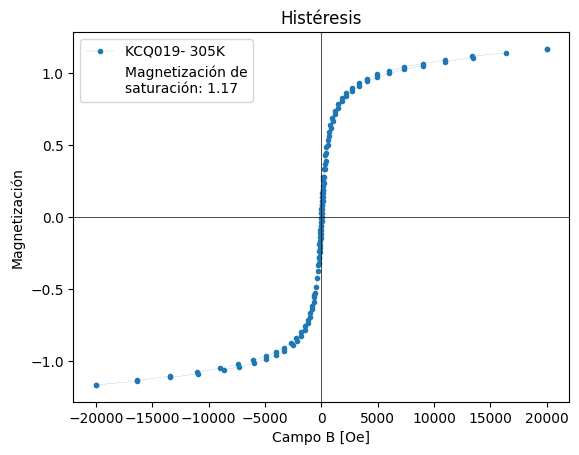

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('KCQ19-Hys.dat', sep=' ', header=None)
df[1] = df[1]
df[2] = df[2]/ 0.0067

plt.plot(df[1].iloc[37:-37], df[2].iloc[37:-37], label='KCQ019- 305K', marker='.', linestyle='-', linewidth=0.1)
plt.xlabel('Campo B [Oe]')
plt.ylabel('Magnetización')
plt.title('Histéresis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)


max_value = df[2].max()

plt.plot([], [], ' ', label=f'Magnetización de\nsaturación: {max_value:.2f}')

plt.legend(loc='upper left')

plt.show()

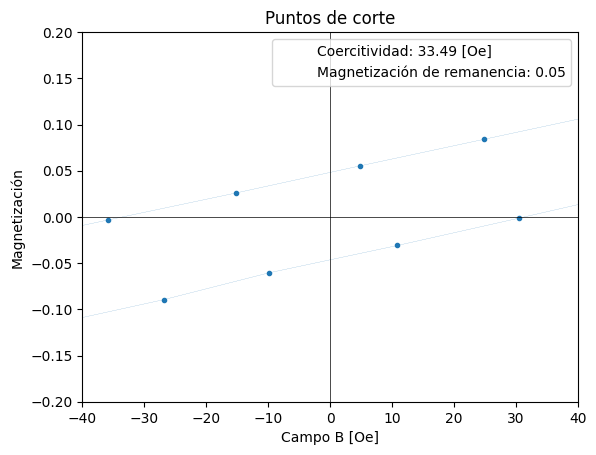

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

ax.plot(df[1].iloc[5:-5], df[2].iloc[5:-5], marker='.', linestyle='-', linewidth=0.1)
ax.set_xlabel('Campo B [Oe]')
ax.set_ylabel('Magnetización')
ax.set_title('Puntos de corte')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

ax.set_xlim(-40, 40)
ax.set_ylim(-0.2, 0.2)

# Encuentra el primer punto de corte con el eje x
x_vals = df[1].iloc[5:-5].values
y_vals = df[2].iloc[5:-5].values
x_intercept = np.nan
for i in range(len(y_vals) - 1):
  if (y_vals[i] * y_vals[i+1] < 0):
    x_intercept = x_vals[i] - y_vals[i] * (x_vals[i+1] - x_vals[i]) / (y_vals[i+1] - y_vals[i])
    break

# Encuentra el primer punto de corte con el eje y
y_intercept = np.nan
for i in range(len(x_vals) - 1):
  if (x_vals[i] * x_vals[i+1] < 0):
    y_intercept = y_vals[i] - x_vals[i] * (y_vals[i+1] - y_vals[i]) / (x_vals[i+1] - x_vals[i])
    break


# Muestra los valores en la leyenda
if not np.isnan(x_intercept):
  ax.plot([], [], ' ', label=f'Coercitividad: {abs(x_intercept):.2f} [Oe]')
if not np.isnan(y_intercept):
  ax.plot([], [], ' ', label=f'Magnetización de remanencia: {abs(y_intercept):.2f}')

ax.legend()

plt.show()